In [1]:
import pandas as pd
import yfinance as yf

In [2]:
# here i am downloading the dataset from yahoo finance and storing it
sp500 = yf.download("^GSPC", start="2005-01-01")

[*********************100%***********************]  1 of 1 completed


In [3]:
sp500.head()

Price,Close,High,Low,Open,Volume
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC
Date,,,,,
2005-01-03,1202.079956,1217.800049,1200.319946,1211.920044,1510800000
2005-01-04,1188.050049,1205.839966,1185.390015,1202.079956,1721000000
2005-01-05,1183.739990,1192.729980,1183.719971,1188.050049,1738900000
2005-01-06,1187.890015,1191.630005,1183.270020,1183.739990,1569100000
2005-01-07,1186.189941,1192.199951,1182.160034,1187.890015,1477900000


In [4]:
sp500.info()

<class 'pandas.DataFrame'>
DatetimeIndex: 5304 entries, 2005-01-03 to 2026-02-02
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   (Close, ^GSPC)   5304 non-null   float64
 1   (High, ^GSPC)    5304 non-null   float64
 2   (Low, ^GSPC)     5304 non-null   float64
 3   (Open, ^GSPC)    5304 non-null   float64
 4   (Volume, ^GSPC)  5304 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 248.6 KB


In [5]:
# saving the original data set
sp500.to_csv("../data/raw/sp500_raw.csv")

In [6]:
# here when we fetch the data from an API such as yahoo finance it gives the data wherein the column names are stored as (a,b)
# below we are extracting the first word or the a^th value of the column to make the dataset more sensible to us and easier to work on
sp500.columns = sp500.columns.get_level_values(0)

In [7]:
# here we create a return column to store the %changes 
sp500["Return"] = sp500["Close"].pct_change()

In [8]:
sp500[["Close", "Return"]].head()

Price,Close,Return
Date,,
2005-01-03,1202.079956,NaN
2005-01-04,1188.050049,-0.011671
2005-01-05,1183.739990,-0.003628
2005-01-06,1187.890015,0.003506
2005-01-07,1186.189941,-0.001431


In [9]:
sp500["Return"].describe()

count    5303.000000
mean        0.000404
std         0.012046
min        -0.119841
25%        -0.004040
50%         0.000735
75%         0.005720
max         0.115800
Name: Return, dtype: float64

In [10]:
# saving the updated dataset
sp500.to_csv("../data/processed/sp500_with_returns.csv")

In [11]:
# computing the rolling volatility and creating 2 new columns for the same for 20 day and 50 day period
sp500["Volatility_20"] = sp500["Return"].rolling(window=20).std()
sp500["Volatility_50"] = sp500["Return"].rolling(window=50).std()

In [12]:
sp500[["Return", "Volatility_20", "Volatility_50"]].head(30)

Price,Return,Volatility_20,Volatility_50
Date,,,
2005-01-03,NaN,NaN,NaN
2005-01-04,-0.011671,NaN,NaN
2005-01-05,-0.003628,NaN,NaN
2005-01-06,0.003506,NaN,NaN
2005-01-07,-0.001431,NaN,NaN
2005-01-10,0.003423,NaN,NaN
2005-01-11,-0.006100,NaN,NaN
2005-01-12,0.003981,NaN,NaN
2005-01-13,-0.008630,NaN,NaN


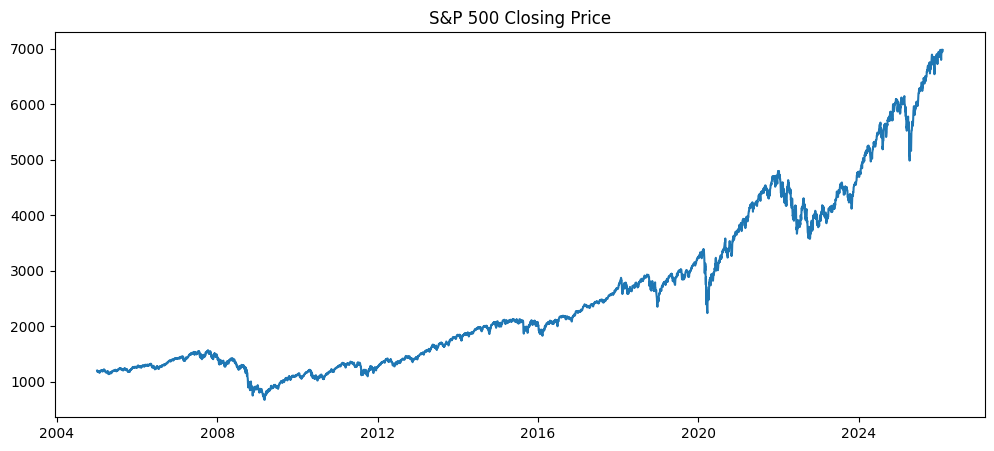

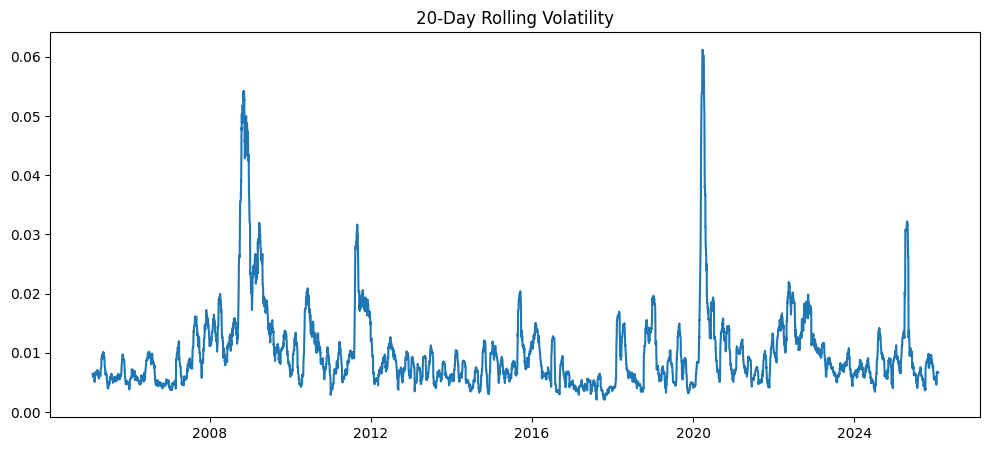

In [13]:
# plotting closing prices and 20-day rolling volatility
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(sp500.index, sp500["Close"])
plt.title("S&P 500 Closing Price")
plt.show()

plt.figure(figsize=(12,5))
plt.plot(sp500.index, sp500["Volatility_20"])
plt.title("20-Day Rolling Volatility")
plt.show()


In [14]:
sp500.to_csv("../data/processed/sp500_with_returns_and_volatility.csv")

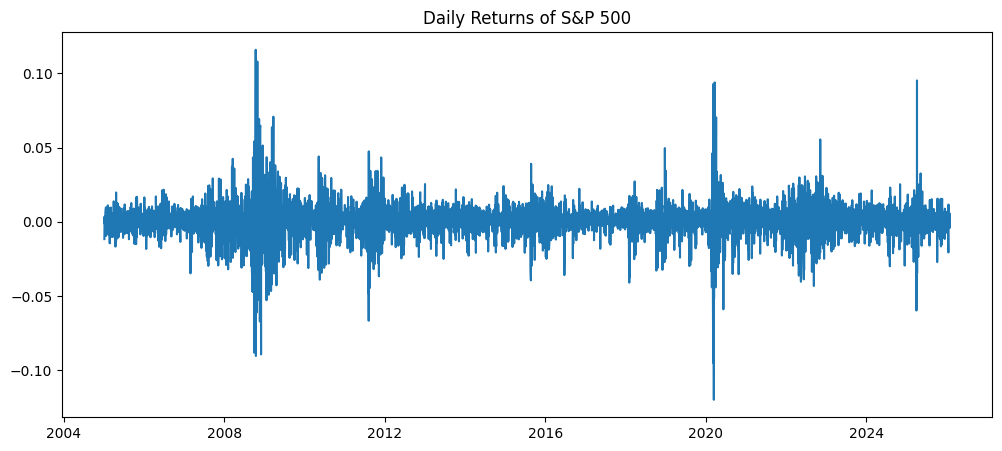

In [15]:
# plotting daily returns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(sp500.index, sp500["Return"])
plt.title("Daily Returns of S&P 500")
plt.show()
# shows market are erratic 

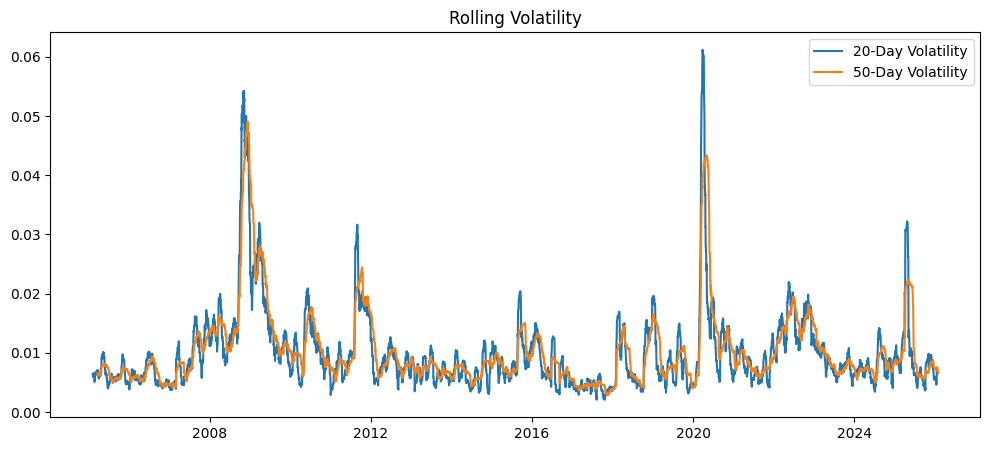

In [16]:
# plot rolling volatility
plt.figure(figsize=(12,5))
plt.plot(sp500.index, sp500["Volatility_20"], label="20-Day Volatility")
plt.plot(sp500.index, sp500["Volatility_50"], label="50-Day Volatility")
plt.legend()
plt.title("Rolling Volatility")
plt.show()

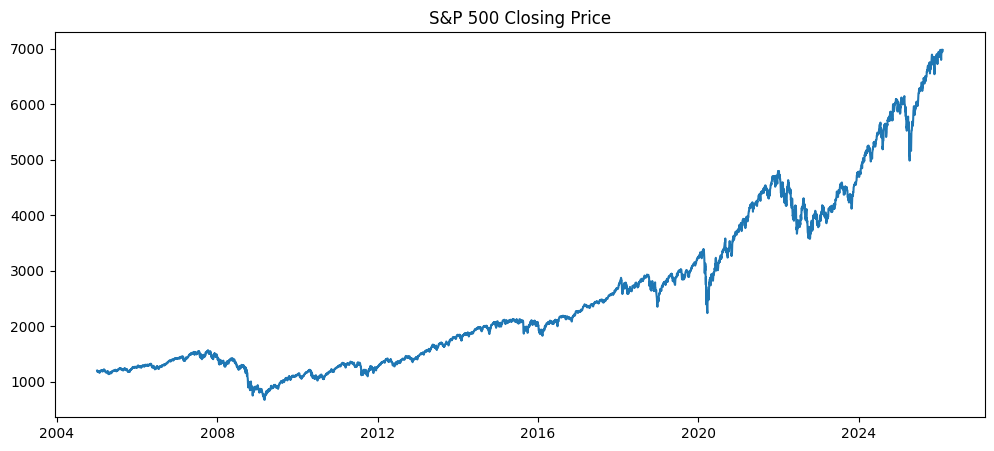

In [17]:
# compare price and volatility
plt.figure(figsize=(12,5))
plt.plot(sp500.index, sp500["Close"])
plt.title("S&P 500 Closing Price")
plt.show()

Volatility shows clustering: calm periods followed by bursts.
Large volatility spikes often align with sharp market drops.
Short-term volatility reacts faster than long-term volatility.


In [18]:
# to see days where markets fell more than 2%
sp500["Large_Negative_Return"] = sp500["Return"] < -0.02
# this returns a true or false value: true for returns less than 2% and accordingly
# primarily used to detect shocks

In [19]:
# rolling avg return (taking mean of returns for a window period of 20 days)
sp500["Rolling_Return_20"] = sp500["Return"].rolling(20).mean()
# this is to notice pattern and not just daily market movement

In [20]:
sp500["Cumulative_Max"] = sp500["Close"].cummax() # this is to remember the highest price seen so far so that we know past peak everyday

# here we now calculate the difference between the closing price and the peak price and store it in terms of percentage
sp500["Drawdown"] = (sp500["Close"] - sp500["Cumulative_Max"]) / sp500["Cumulative_Max"]
# this tells us how low the market is from the peak value

In [21]:
type(sp500["Close"])


pandas.Series

In [22]:
sp500[["Close","Cumulative_Max","Drawdown"]].head()

Price,Close,Cumulative_Max,Drawdown
Date,,,
2005-01-03,1202.079956,1202.079956,0.000000
2005-01-04,1188.050049,1202.079956,-0.011671
2005-01-05,1183.739990,1202.079956,-0.015257
2005-01-06,1187.890015,1202.079956,-0.011804
2005-01-07,1186.189941,1202.079956,-0.013219


In [23]:
sp500[[
    "Return",
    "Large_Negative_Return",
    "Rolling_Return_20",
    "Drawdown"
]].head(30)

Price,Return,Large_Negative_Return,Rolling_Return_20,Drawdown
Date,,,,
2005-01-03,NaN,False,NaN,0.000000
2005-01-04,-0.011671,False,NaN,-0.011671
2005-01-05,-0.003628,False,NaN,-0.015257
2005-01-06,0.003506,False,NaN,-0.011804
2005-01-07,-0.001431,False,NaN,-0.013219
2005-01-10,0.003423,False,NaN,-0.009841
2005-01-11,-0.006100,False,NaN,-0.015881
2005-01-12,0.003981,False,NaN,-0.011963
2005-01-13,-0.008630,False,NaN,-0.020489


In [24]:
sp500.to_csv("../data/processed/sp500_with_features.csv")

In [25]:
# creating a feature dataframe 
features = sp500[[
    "Return",
    "Volatility_20",
    "Volatility_50",
    "Rolling_Return_20",
    "Drawdown"
]]


In [26]:
# dropping the missing rows
features=features.dropna()

In [27]:
# scaling so that mean=0 and standard deviation=1
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


In [28]:
features_scaled.shape

(5254, 5)

In [29]:
# importing Kmeans from the cluster library of scikit-learn
from sklearn.cluster import KMeans

In [30]:
# creating 3 clusters
k = 3


In [31]:
kmeans = KMeans(n_clusters=k, random_state=42)

In [32]:
kmeans.fit(features_scaled)

,"n_clusters n_clusters: int, default=8The number of clusters to form as well as the number ofcentroids to generate.For an example of how to choose an optimal value for `n_clusters` refer to:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_silhouette_analysis.py`.",3
,"init init: {'k-means++', 'random'}, callable or array-like of shape (n_clusters, n_features), default='k-means++'Method for initialization:* 'k-means++' : selects initial cluster centroids using sampling based on an empirical probability distribution of the points' contribution to the overall inertia. This technique speeds up convergence. The algorithm implemented is ""greedy k-means++"". It differs from the vanilla k-means++ by making several trials at each sampling step and choosing the best centroid among them.* 'random': choose `n_clusters` observations (rows) at random from data for the initial centroids.* If an array is passed, it should be of shape (n_clusters, n_features) and gives the initial centers.* If a callable is passed, it should take arguments X, n_clusters and a random state and return an initialization.For an example of how to use the different `init` strategies, see:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_digits.py`.For an evaluation of the impact of initialization, see the example:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_stability_low_dim_dense.py`.",'k-means++'
,"n_init n_init: 'auto' or int, default='auto'Number of times the k-means algorithm is run with different centroidseeds. The final results is the best output of `n_init` consecutive runsin terms of inertia. Several runs are recommended for sparsehigh-dimensional problems (see :ref:`kmeans_sparse_high_dim`).When `n_init='auto'`, the number of runs depends on the value of init:10 if using `init='random'` or `init` is a callable;1 if using `init='k-means++'` or `init` is an array-like... versionadded:: 1.2 Added 'auto' option for `n_init`... versionchanged:: 1.4 Default value for `n_init` changed to `'auto'`.",'auto'
,"max_iter max_iter: int, default=300Maximum number of iterations of the k-means algorithm for asingle run.",300
,"tol tol: float, default=1e-4Relative tolerance with regards to Frobenius norm of the differencein the cluster centers of two consecutive iterations to declareconvergence.",0.0001
,"verbose verbose: int, default=0Verbosity mode.",0
,"random_state random_state: int, RandomState instance or None, default=NoneDetermines random number generation for centroid initialization. Usean int to make the randomness deterministic.See :term:`Glossary `.",42
,"copy_x copy_x: bool, default=TrueWhen pre-computing distances it is more numerically accurate to centerthe data first. If copy_x is True (default), then the original data isnot modified. If False, the original data is modified, and put backbefore the function returns, but small numerical differences may beintroduced by subtracting and then adding the data mean. Note that ifthe original data is not C-contiguous, a copy will be made even ifcopy_x is False. If the original data is sparse, but not in CSR format,a copy will be made even if copy_x is False.",True
,"algorithm algorithm: {""lloyd"", ""elkan""}, default=""lloyd""K-means algorithm to use. The classical EM-style algorithm is `""lloyd""`.The `""elkan""` variation can be more efficient on some datasets withwell-defined clusters, by using the triangle inequality. However it'smore memory intensive due to the allocation of an extra array of shape`(n_samples, n_clusters)`... versionchanged:: 0.18 Added Elkan algorithm.. versionchanged:: 1.1 Renamed ""full"" to ""lloyd"", and deprecated ""auto"" and ""full"". Changed ""auto"" to use ""lloyd"" instead of ""elkan"".",'lloyd'


In [33]:
kmeans.fit(features_scaled)

,"n_clusters n_clusters: int, default=8The number of clusters to form as well as the number ofcentroids to generate.For an example of how to choose an optimal value for `n_clusters` refer to:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_silhouette_analysis.py`.",3
,"init init: {'k-means++', 'random'}, callable or array-like of shape (n_clusters, n_features), default='k-means++'Method for initialization:* 'k-means++' : selects initial cluster centroids using sampling based on an empirical probability distribution of the points' contribution to the overall inertia. This technique speeds up convergence. The algorithm implemented is ""greedy k-means++"". It differs from the vanilla k-means++ by making several trials at each sampling step and choosing the best centroid among them.* 'random': choose `n_clusters` observations (rows) at random from data for the initial centroids.* If an array is passed, it should be of shape (n_clusters, n_features) and gives the initial centers.* If a callable is passed, it should take arguments X, n_clusters and a random state and return an initialization.For an example of how to use the different `init` strategies, see:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_digits.py`.For an evaluation of the impact of initialization, see the example:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_stability_low_dim_dense.py`.",'k-means++'
,"n_init n_init: 'auto' or int, default='auto'Number of times the k-means algorithm is run with different centroidseeds. The final results is the best output of `n_init` consecutive runsin terms of inertia. Several runs are recommended for sparsehigh-dimensional problems (see :ref:`kmeans_sparse_high_dim`).When `n_init='auto'`, the number of runs depends on the value of init:10 if using `init='random'` or `init` is a callable;1 if using `init='k-means++'` or `init` is an array-like... versionadded:: 1.2 Added 'auto' option for `n_init`... versionchanged:: 1.4 Default value for `n_init` changed to `'auto'`.",'auto'
,"max_iter max_iter: int, default=300Maximum number of iterations of the k-means algorithm for asingle run.",300
,"tol tol: float, default=1e-4Relative tolerance with regards to Frobenius norm of the differencein the cluster centers of two consecutive iterations to declareconvergence.",0.0001
,"verbose verbose: int, default=0Verbosity mode.",0
,"random_state random_state: int, RandomState instance or None, default=NoneDetermines random number generation for centroid initialization. Usean int to make the randomness deterministic.See :term:`Glossary `.",42
,"copy_x copy_x: bool, default=TrueWhen pre-computing distances it is more numerically accurate to centerthe data first. If copy_x is True (default), then the original data isnot modified. If False, the original data is modified, and put backbefore the function returns, but small numerical differences may beintroduced by subtracting and then adding the data mean. Note that ifthe original data is not C-contiguous, a copy will be made even ifcopy_x is False. If the original data is sparse, but not in CSR format,a copy will be made even if copy_x is False.",True
,"algorithm algorithm: {""lloyd"", ""elkan""}, default=""lloyd""K-means algorithm to use. The classical EM-style algorithm is `""lloyd""`.The `""elkan""` variation can be more efficient on some datasets withwell-defined clusters, by using the triangle inequality. However it'smore memory intensive due to the allocation of an extra array of shape`(n_samples, n_clusters)`... versionchanged:: 0.18 Added Elkan algorithm.. versionchanged:: 1.1 Renamed ""full"" to ""lloyd"", and deprecated ""auto"" and ""full"". Changed ""auto"" to use ""lloyd"" instead of ""elkan"".",'lloyd'


In [34]:
regimes = kmeans.labels_


In [35]:
sp500_regimes = sp500.loc[features.index].copy()
sp500_regimes["Regime"] = regimes

In [36]:
sp500_regimes[["Return", "Volatility_20", "Drawdown", "Regime"]].head()

Price,Return,Volatility_20,Drawdown,Regime
Date,,,,
2005-03-16,-0.008082,0.007079,-0.030392,0
2005-03-17,0.001801,0.007101,-0.028646,0
2005-03-18,-0.000470,0.006901,-0.029103,0
2005-03-21,-0.004934,0.006967,-0.033893,0
2005-03-22,-0.010196,0.006574,-0.043744,0


In [38]:
sp500_regimes.groupby("Regime")[[
    "Return",
    "Volatility_20",
    "Drawdown"
]].mean()

Price,Return,Volatility_20,Drawdown
Regime,,,
0,0.000954,0.007069,-0.030384
1,-0.000975,0.034498,-0.367353
2,-0.000814,0.013759,-0.191109


Plot Price Colored by Regime:

import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.scatter(sp500_regimes.index, sp500_regimes["Close"],
            c=sp500_regimes["Regime"], s=2)
plt.title("S&P 500 Price Colored by Regime")
plt.show()

Counting the number of days in each regime:

In [40]:
sp500_regimes["Regime"].value_counts()

Regime
0    3653
2    1386
1     215
Name: count, dtype: int64

Boxplot of returns by regimes:

<Figure size 800x500 with 0 Axes>

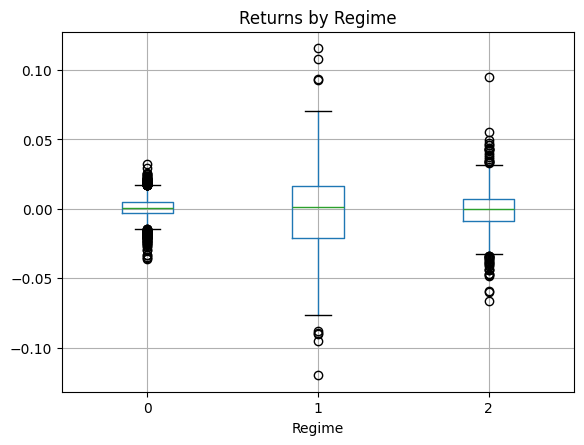

In [41]:
plt.figure(figsize=(8,5))
sp500_regimes.boxplot(column="Return", by="Regime")
plt.title("Returns by Regime")
plt.suptitle("")
plt.show()

In [ ]:
## 📦 Boxplot – What It Is and How to Read It
A boxplot is a visualization that shows how a variable is distributed.
It summarizes the spread, center, and extreme values of the data.
    
In this project, the boxplot shows how **daily returns are distributed inside each market regime**.
### 🔹 Components of a Boxplot
1. **Median (Middle Line)**
   - The line inside the box
   - Represents the middle value (50th percentile)

2. **Lower Quartile (Q1)**
   - Bottom of the box
   - 25% of values lie below this

3. **Upper Quartile (Q3)**
   - Top of the box
   - 75% of values lie below this

4. **Box (Q1 to Q3)**
   - Contains the middle 50% of data

5. **Whiskers**
   - Extend from the box
   - Show typical minimum and maximum values

6. **Outliers (Dots)**
   - Extreme unusual values
### 🔹 How to Read a Boxplot
For each regime:
- Look at the **median line**
  - Above zero → positive tendency
  - Below zero → negative tendency

- Look at **box height**
  - Small box → stable behavior
  - Tall box → high variability

- Look at **whiskers**
  - Short → few extreme moves
  - Long → frequent large moves
---
### 🔹 What This Boxplot Represents in This Project
Each box shows:
> Distribution of daily returns inside that regime
This allows comparison between regimes:
- Which regime has higher typical returns
- Which regime is riskier
- Which regime has extreme movements
---
### 🔹 Typical Interpretation
- Calm Regime:
  - Slightly positive median
  - Small box
  - Low risk

- Stress Regime:
  - Negative median
  - Tall box
  - High risk

- Transition Regime:
  - Median near zero
  - Medium box
  - Mixed behavior
---
### 🔹 Why Boxplots Are Useful
- Compare multiple groups easily
- Robust to outliers
- Show distribution shape quickly
### 🧠 One-Line Summary
A boxplot visually summarizes where most values lie and how spread out they are, allowing easy comparison of behavior across regimes.


<Figure size 800x500 with 0 Axes>

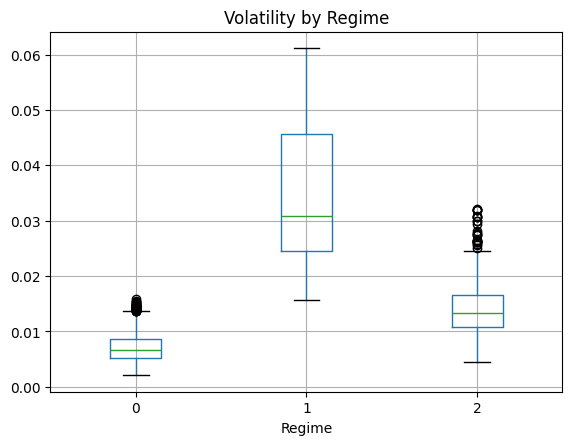

In [42]:
plt.figure(figsize=(8,5))
sp500_regimes.boxplot(column="Volatility_20", by="Regime")
plt.title("Volatility by Regime")
plt.suptitle("")
plt.show()

<Figure size 800x500 with 0 Axes>

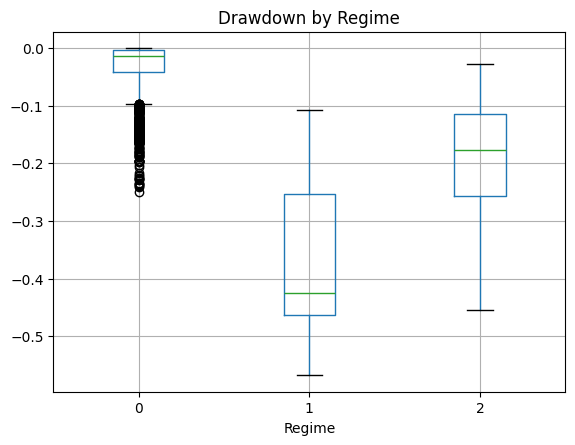

In [43]:
plt.figure(figsize=(8,5))
sp500_regimes.boxplot(column="Drawdown", by="Regime")
plt.title("Drawdown by Regime")
plt.suptitle("")
plt.show()

In [44]:
sp500_regimes.to_csv("../data/processed/sp500_with_regimes.csv")